In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from PIL import Image
import tensorflow as tf
import os

2023-12-07 22:33:25.809792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def create_dataframe_from_image_directory(base_dir, labeled=True):
    if labeled:
        dir = {"images": [], "labels": []}
        for i in os.listdir(base_dir):
            img_dirs = os.path.join(base_dir, i)
            for j in os.listdir(img_dirs):
                img = os.path.join(img_dirs, j)
                image = Image.open(img).resize((224, 224))
                image_array = tf.keras.utils.img_to_array(image)
                image_array = tf.expand_dims(image_array, 0)

                dir["images"].append(image_array)
                dir["labels"].append(i)
    else:
        dir = {"images": []}
        for i in os.listdir(base_dir):
            img_dir = os.path.join(base_dir, i)

            image = Image.open(img_dir).resize((224, 224))
            image_array = tf.keras.utils.img_to_array(image)
            image_array = tf.expand_dims(image_array, 0)

            dir["images"].append(image_array)
    df = pd.DataFrame(dir)
    return df

In [ ]:
path_to_data = "../data/flowers"
data = create_dataframe_from_image_directory(path_to_data)

In [ ]:
data.shape

(4317, 2)

In [ ]:
data.head(), data.tail()

(                                              images labels
 0  (((tf.Tensor([ 81. 103.  28.], shape=(3,), dty...  daisy
 1  (((tf.Tensor([30. 35.  3.], shape=(3,), dtype=...  daisy
 2  (((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...  daisy
 3  (((tf.Tensor([22. 37. 12.], shape=(3,), dtype=...  daisy
 4  (((tf.Tensor([48. 58. 49.], shape=(3,), dtype=...  daisy,
                                                  images     labels
 4312  (((tf.Tensor([249. 252. 106.], shape=(3,), dty...  sunflower
 4313  (((tf.Tensor([79. 88. 92.], shape=(3,), dtype=...  sunflower
 4314  (((tf.Tensor([46. 62. 16.], shape=(3,), dtype=...  sunflower
 4315  (((tf.Tensor([222. 228. 243.], shape=(3,), dty...  sunflower
 4316  (((tf.Tensor([105. 104. 109.], shape=(3,), dty...  sunflower)

In [ ]:
tulips = data[data["labels"] == "tulip"]
print(tulips.count())

images    984
labels    984
dtype: int64


In [ ]:
daisy = data[data["labels"] == "daisy"]
dandelion = data[data["labels"] == "dandelion"]
sunflower = data[data["labels"] == "sunflower"]
rose = data[data["labels"] == "rose"]
print(daisy.count(), dandelion.count(), sunflower.count(), rose.count())

images    764
labels    764
dtype: int64 images    1052
labels    1052
dtype: int64 images    733
labels    733
dtype: int64 images    784
labels    784
dtype: int64


In [ ]:
print(tulips.count() + daisy.count() + dandelion.count() + sunflower.count() + rose.count())

images    4317
labels    4317
dtype: int64


In [ ]:
labels = data["labels"].unique()
print(labels)

['daisy' 'rose' 'tulip' 'dandelion' 'sunflower']


In [ ]:
print(data.isnull().sum())

images    0
labels    0
dtype: int64


In [ ]:
le = LabelEncoder()
data["labels"] = le.fit_transform(data["labels"])
data.head()

,images,labels
0,"(((tf.Tensor([ 81. 103. 28.], shape=(3,), dty...",0
1,"(((tf.Tensor([30. 35. 3.], shape=(3,), dtype=...",0
2,"(((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...",0
3,"(((tf.Tensor([22. 37. 12.], shape=(3,), dtype=...",0
4,"(((tf.Tensor([48. 58. 49.], shape=(3,), dtype=...",0


In [ ]:
data["images"] = data["images"].apply(lambda x: tf.cast(x, tf.float32) / 255.0)

In [ ]:
data.head()

,images,labels
0,(((tf.Tensor([0.31764707 0.40392157 0.10980392...,0
1,(((tf.Tensor([0.11764706 0.13725491 0.01176471...,0
2,"(((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...",0
3,(((tf.Tensor([0.08627451 0.14509805 0.04705882...,0
4,(((tf.Tensor([0.1882353 0.22745098 0.19215687...,0


In [ ]:
X, y = data["images"], data["labels"]
X.shape, y.shape

((4317,), (4317,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3453,), (864,), (3453,), (864,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3107,), (346,), (3107,), (346,))

In [ ]:
X_train = np.array(X_train.tolist()).reshape(-1, 224, 224, 3)
X_val = np.array(X_val.tolist()).reshape(-1, 224, 224, 3)
X_test = np.array(X_test.tolist()).reshape(-1, 224, 224, 3)
X_train.shape, X_val.shape, X_test.shape

((3107, 224, 224, 3), (346, 224, 224, 3), (864, 224, 224, 3))

In [ ]:
# y_train = np.array(y_train.tolist())
# y_val = np.array(y_val.tolist())
# y_test = np.array(y_test.tolist())
# y_train.shape, y_val.shape, y_test.shape

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((3107, 5), (346, 5), (864, 5))

In [ ]:
y_train[0], y_val[0], y_test[0]

(array([1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1., 0.], dtype=float32))

In [ ]:
def build_and_visualise_model(
    filters, kernel, pooling_size, strides, dropout_rate, dense_units, lr
):
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(
                filters=filters,
                kernel_size=kernel,
                activation="relu",
                input_shape=(224, 224, 3),
                padding="same",
                strides=strides,
            ),
            tf.keras.layers.MaxPool2D(pool_size=pooling_size, strides=strides, padding="same"),
            tf.keras.layers.Dropout(dropout_rate),
            
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=kernel, activation="relu", padding="same", strides=strides
            ),
            tf.keras.layers.MaxPool2D(pool_size=pooling_size, strides=strides),
            tf.keras.layers.Dropout(dropout_rate),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(dense_units, activation="relu"),
            tf.keras.layers.Dropout(dropout_rate),
            
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dropout(dropout_rate),
            
            tf.keras.layers.Dense(units=5, activation="softmax"),
        ]
    )
    model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
model = build_and_visualise_model(filters=32, kernel=(3, 3), pooling_size=(2, 2), strides=(2, 2), dropout_rate=0.2, dense_units=128, lr=0.001)


In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3107, 224, 224, 3), (3107, 5), (346, 224, 224, 3), (346, 5))

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
98/98 [==============================] - 28s 258ms/step - loss: 1.3924 - accuracy: 0.3711 - val_loss: 1.2297 - val_accuracy: 0.4711
Epoch 2/50
98/98 [==============================] - 19s 196ms/step - loss: 1.1498 - accuracy: 0.4963 - val_loss: 1.0944 - val_accuracy: 0.5434
Epoch 3/50
98/98 [==============================] - 19s 196ms/step - loss: 1.0459 - accuracy: 0.5697 - val_loss: 1.0631 - val_accuracy: 0.5434
Epoch 4/50
98/98 [==============================] - 19s 192ms/step - loss: 0.9343 - accuracy: 0.6279 - val_loss: 1.0445 - val_accuracy: 0.6098
Epoch 5/50
98/98 [==============================] - 19s 189ms/step - loss: 0.8201 - accuracy: 0.6762 - val_loss: 0.8966 - val_accuracy: 0.6387
Epoch 6/50
98/98 [==============================] - 19s 189ms/step - loss: 0.7018 - accuracy: 0.7348 - val_loss: 0.8882 - val_accuracy: 0.6705
Epoch 7/50
98/98 [==============================] - 19s 191ms/step - loss: 0.5883 - accuracy: 0.7956 - val_loss: 0.9101 - val_accuracy: 0.6705

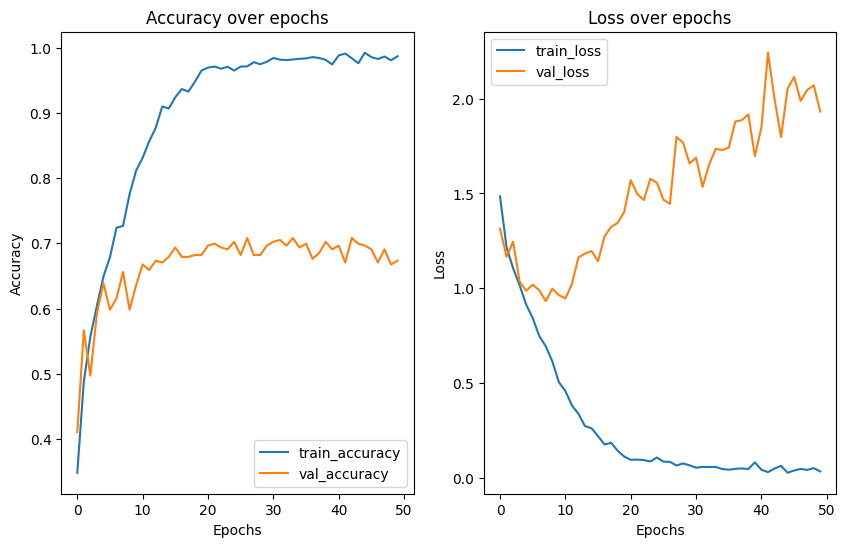

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()